In [1]:
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from astroML import stats as asts
import csv

In [2]:
n = 1000
mean = 1.5
stddev = 0.5

In [3]:
distribution = stats.norm(mean, stddev)
draws = distribution.rvs(n)
draws.sort()
pdf = distribution.pdf(draws)

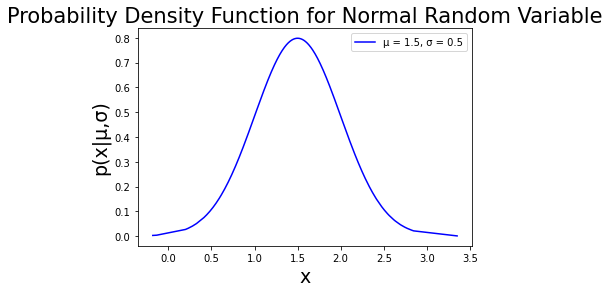

The mean of the given sample is: 1.4917738619099914
The variance of the given sample is: 0.2617425499364973
The standard deviation of the given sample is: 0.5116078087133711
The skewness of the given sample is: 0.042625311053066564
The kurtosis of the given sample is: -0.10986129772591235
The standard deviation using MAD: 2.7744156076103352
The standard deviation using sigmaG: 0.5346078397663254





In [4]:
legend = ["μ = 1.5, σ = 0.5"]
plt.plot(draws, pdf, color = "blue")
plt.title("Probability Density Function for Normal Random Variable", size = 21)
plt.xlabel("x", size = 19)
plt.ylabel("p(x|μ,σ)", size = 19)
plt.legend(legend)
plt.show()

mean = np.mean(draws)
print(f'The mean of the given sample is: {mean}')

variance = np.var(draws)
print(f'The variance of the given sample is: {variance}\nThe standard deviation of the given sample is: {pow(variance, 0.5)}')

skewness = scipy.stats.skew(draws)
print(f'The skewness of the given sample is: {skewness}')

kurtosis = scipy.stats.kurtosis(draws)
print(f'The kurtosis of the given sample is: {kurtosis}')

median_draws = np.median(draws)
corr_draws = np.zeros(np.size(draws))
i = 1
for xi in draws:
    corr_draws = abs(xi - median_draws)
    i += 1
mad = np.median(corr_draws)
stddev_using_mad = 1.482 * mad 
print(f'The standard deviation using MAD: {stddev_using_mad}')

stddev_using_sigmaG = asts.sigmaG(draws)
print(f'The standard deviation using sigmaG: {stddev_using_sigmaG}\n\n\n')

In [5]:
draws = np.arange(-5.5, 5.5, 0.01)

cauchy_distribution = stats.cauchy(0, 1.5)
cauchy_pdf = cauchy_distribution.pdf(draws)

normal_distribution = stats.norm(0, 1.5)
normal_pdf = normal_distribution.pdf(draws)

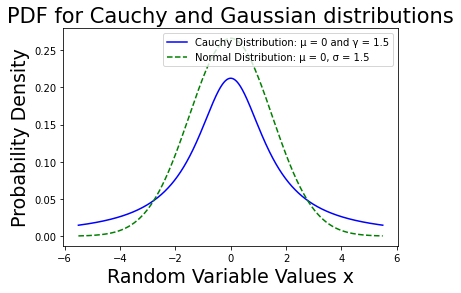

In [6]:
legend = ["Cauchy Distribution: μ = 0 and γ = 1.5", "Normal Distribution: μ = 0, σ = 1.5"]
plt.plot(draws, cauchy_pdf, color = "blue")
plt.plot(draws, normal_pdf, color = "green", ls = "--")
plt.title("PDF for Cauchy and Gaussian distributions", size = 21)
plt.xlabel("Random Variable Values x", size = 19)
plt.ylabel("Probability Density", size = 19)
plt.legend(legend)
plt.show()

In [7]:
poisson_draws = np.arange(-2, 15, 1)
normal_draws = np.arange(-2, 15, 0.01)

poisson_distribution = stats.poisson(5)
poisson_pdf = poisson_distribution.pmf(poisson_draws)

normal_distribution = stats.norm(5, pow(5, 0.5))
normal_pdf = normal_distribution.pdf(normal_draws)

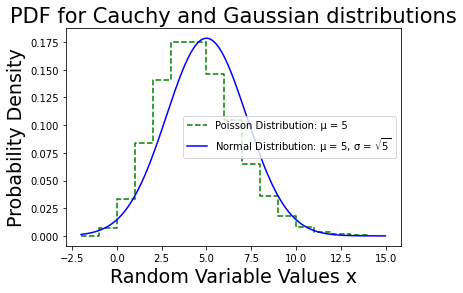

In [8]:
legend = ["Poisson Distribution: μ = 5", "Normal Distribution: μ = 5, σ = " + r"$\sqrt{5}$"]
plt.step(poisson_draws, poisson_pdf, color = "green", ls = "--")
plt.plot(normal_draws, normal_pdf, color = "blue")
plt.title("PDF for Cauchy and Gaussian distributions", size = 21)
plt.xlabel("Random Variable Values x", size = 19)
plt.ylabel("Probability Density", size = 19)
plt.legend(legend)
plt.show()

In [9]:
data = [0.8920, 0.881, 0.8913, 0.9837, 0.8958]
error = [0.00044, 0.009, 0.00032, 0.00048, 0.00045]

weighted_mean = 0
uncertainty_in_mean = 0

for i in range(5):
    weighted_mean += (data[i] / pow(error[i], 2))
    uncertainty_in_mean += (1 / pow(error[i], 2))

weighted_mean /= uncertainty_in_mean
uncertainty_in_mean = 1 / uncertainty_in_mean

print(f'The weighted mean of lifetime of K meson is: {weighted_mean} in 10^(-10)s')
print(f'The uncertainty in mean of lifetime is: {pow(uncertainty_in_mean, 0.5)}\n\n')

The weighted mean of lifetime of K meson is: 0.9089185199574897 in 10^(-10)s
The uncertainty in mean of lifetime is: 0.00020318737026848627




In [10]:
data = []
num_categories = 16

In [11]:
with open ("exoplanet.eu_catalog.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    fields = next(csvreader)
    index = fields.index('eccentricity')

    for row in csvreader:
        if (row[index] != '') and (row[index] != '0.0'):
            data.append(float(row[index]))

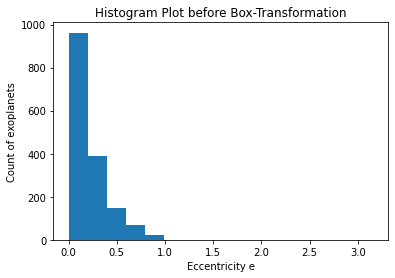

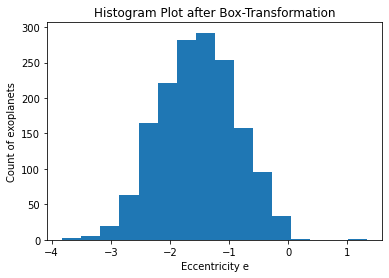

In [12]:
plt.hist(data, bins = num_categories)
plt.title("Histogram Plot before Box-Transformation")
plt.xlabel("Eccentricity e")
plt.ylabel("Count of exoplanets")
plt.show()

new_data, tmp = scipy.stats.boxcox(data)

plt.hist(new_data, bins = num_categories)
plt.title("Histogram Plot after Box-Transformation")
plt.xlabel("Eccentricity e")
plt.ylabel("Count of exoplanets")
plt.show()